In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from config import Path

In [2]:
DataPath=Path["image"]

In [3]:
train, test=tf.keras.utils.image_dataset_from_directory(directory=DataPath,seed=1,validation_split=0.2, subset="both")
data_iterator=train.as_numpy_iterator()
batch=data_iterator.next()

Found 35 files belonging to 9 classes.
Using 28 files for training.
Using 7 files for validation.


In [4]:
# batch[0]-images
# batch[1]-labels
batch[1]

array([8, 5, 3, 6, 7, 5, 8, 7, 3, 7, 8, 6, 7, 4, 8, 2, 0, 6, 7, 4, 2, 0,
       0, 5, 4, 1, 0, 0])

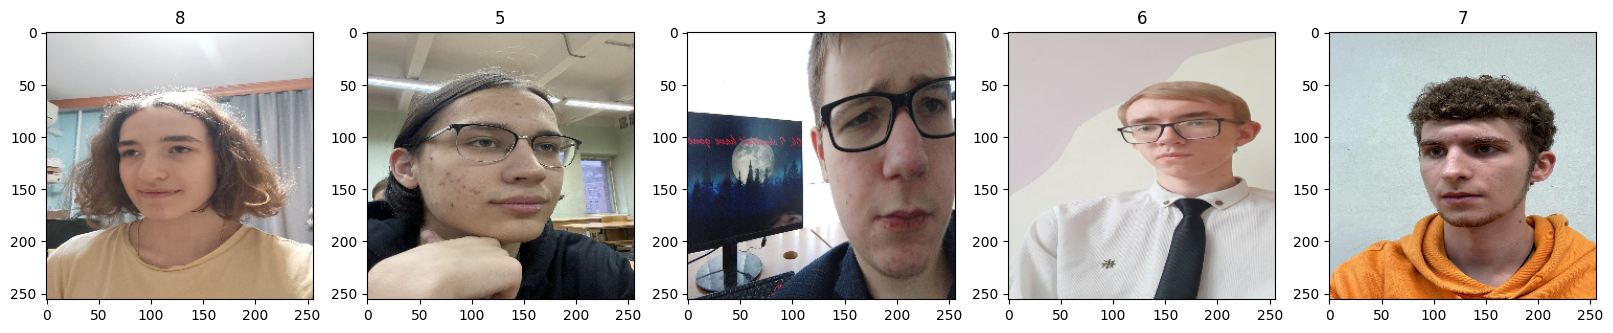

In [5]:
fig, ax =plt.subplots(ncols=5,figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [6]:
img=np.array(img,dtype="uint8")
img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)